In [23]:
!pip install scikit-image
!pip install opencv-python-headless

     |████████████████████████████████| 29.2 MB 16.0 MB/s 
     |████████████████████████████████| 3.3 MB 26.1 MB/s 
     |████████████████████████████████| 169 kB 43.2 MB/s 
     |████████████████████████████████| 4.4 MB 43.4 MB/s 
     |████████████████████████████████| 1.6 MB 34.5 MB/s 
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Not uninstalling decorator at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'decorator'. No files were found to uninstall.


## Edge detection

In [24]:
import skimage
import skimage.feature
import skimage.viewer

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Viewer requires Qt
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
from PIL import Image
import numpy as np
import cv2

In [27]:
import matplotlib.pyplot as plt

### skimage

In [37]:
img  =  Image.open("pics/4.png")
img = img.convert("RGB")
img_np =  np.asarray(img)
img_grey = np.array(img.convert('L'),'f')

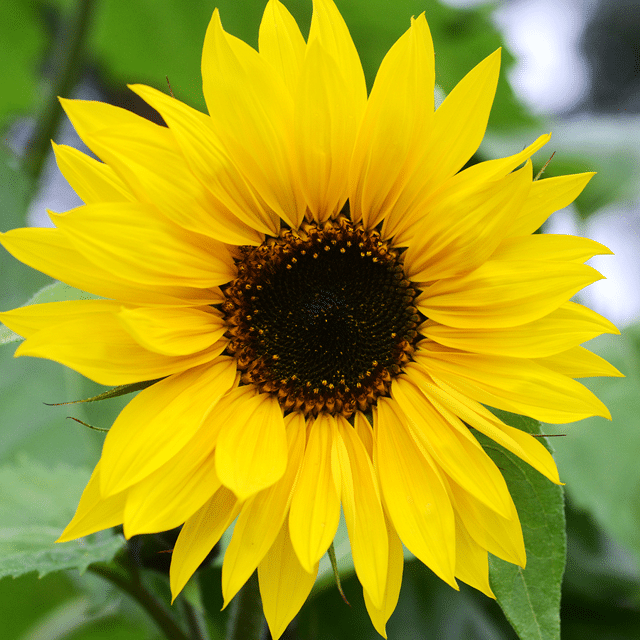

In [83]:
img

In [42]:
edges = skimage.feature.canny(img_grey, sigma = 0.5,  low_threshold = 100, high_threshold = 200)

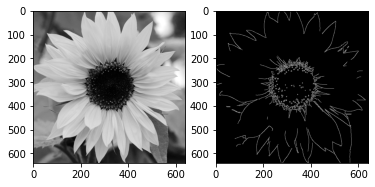

In [28]:
images = [img_grey, edges]
location = [121, 122] 
for loc, edge_image in zip(location, images): 
   plt.subplot(loc) 
   plt.imshow(edge_image, cmap='gray')

### Open CV

In [ ]:
img = cv2.imread("pics/4.png", 0)

In [ ]:
edges_detected = cv2.Canny(img, 100, 200) 

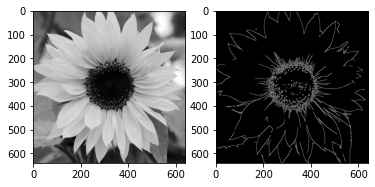

In [ ]:
images = [img , edges_detected]
location = [121, 122] 
for loc, edge_image in zip(location, images): 
   plt.subplot(loc) 
   plt.imshow(edge_image, cmap='gray')

## Pixelate

In [41]:
img_np[1][2]

array([ 77, 124,  15], dtype=uint8)

In [2]:
range(2)

range(0, 2)

In [120]:
edges

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [167]:
def edge_detection(block_pixels, edges):
    edge_pixels = []
    for pixel in block_pixels:
        r, c = pixel[0], pixel[1]
        if edges[r][c] == True:
            edge_pixels.append(pixel)
    if edge_pixels:
        return edge_pixels
    else:
        return False

In [166]:
def edge_or_not(s, edges):
    if True in edges[s[0]: s[2]+1, s[1]:s[3]+1]:
        return True
    else:
        return False

In [107]:
def get_averageRGB(img_array, s, block_size):
  block_img = img_array[s[0]:s[2] + 1, s[1]:s[3] + 1]
  return np.average(block_img.reshape(block_size**2, 3), axis=0).astype(int)

In [169]:
def change_block(x, y, block_size, img_array, edges):
    block_pixels = []
    block_sides = [x, y, x + block_size - 1, y + block_size - 1]
    for i in range(block_size):
        for j in range(block_size):
            block_pixels.append([x + i, y + j])

    if edge_or_not(block_sides, edges):   # ONLY CONSIDER PICTURES WITHOUT DISTINCT CONTOURS
        color_dict = {}
        colors = {}
        for pixel in block_pixels:
            if not str(img_array[pixel[0], pixel[1]]) in color_dict.keys():
                color_dict[str(img_array[pixel[0], pixel[1]])] = 1
                colors[str(img_array[pixel[0], pixel[1]])] = img_array[pixel[0], pixel[1]]
            else:
                color_dict[str(img_array[pixel[0], pixel[1]])] += 1
        max_color_num = max(color_dict.values())
        max_color = [k for k,v in color_dict.items() if v == max_color_num]
        max_color_list = np.array([v for k,v in colors.items() if k in max_color])
        new_color = np.average(np.array(max_color_list), axis = 0).astype(int)
    else:
        new_color = get_averageRGB(img_array, block_sides, block_size)
    return block_pixels, new_color


In [150]:
num_w = 64
num_h = 64
width, height = img.size

In [151]:
block_size = width // num_w

In [203]:
img_new = img_np.copy()
img_np_resized = np.zeros((num_w, num_h, 3))
for x in range(0,width,block_size):
    for y in range(0,width,block_size):
        block_pixels = change_block(x, y, block_size, img_np, edges)[0]
        block_color = change_block(x, y, block_size, img_np, edges)[1]
        img_np_resized[int(x/block_size)][int(y/block_size)] = block_color
        for pixel in block_pixels:
            img_new[pixel[0], pixel[1]] = block_color

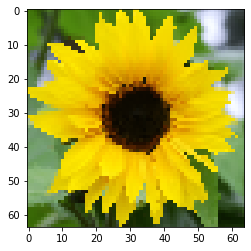

In [220]:
plt.imshow(img_np_resized)

In [221]:
np.save("try.npy", img_np_resized)

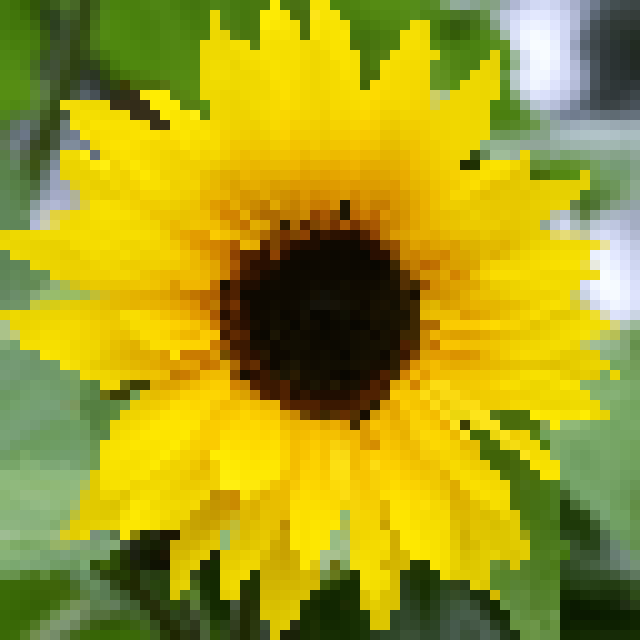

In [207]:
Image.fromarray(img_new)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=768076c7-65ce-42d5-b86d-074f9f75d785' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>